In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import matplotlib.cm as cm
from sklearn.cluster import KMeans
%matplotlib inline

1. **Загрузим наш датафрейм через гит**

In [ ]:
dataframe = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML6.1_clustering/data/Mall_Customers.csv')
dataframe.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
dataframe_is_null = dataframe.isnull()

2. Проверьте датасет на наличие пустых значений. Если есть пустые значения, то заменить их на наиболее подходящие.

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
dataframe_is_null

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


**Видим что в нашем датафрейме нет значений null** 

3. Постройте графическую интерпретацию значений датасета. В качестве x-координаты используйте Annual Income, в качестве y-координаты Spending Score.

Annual Income - Годовой доход (тыс. $)


---


Spending Score - Оценка расходов

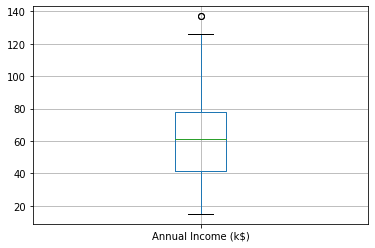

In [ ]:
dataframe.boxplot(column="Annual Income (k$)")

Имеется 1 выброс в датасете в столбце Annual Income (k$) которое по всей видимости имеет максимальное значение из всего столбца

In [ ]:
max_score_of_annual = dataframe['Annual Income (k$)'].max()

In [ ]:
max_score_of_annual

137

In [ ]:
# WTF как их тут два 0_0
# пока не удаляем, если не будет сильно влиять на дальнейшую работу
dataframe[dataframe["Annual Income (k$)"] == 137]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
198,199,Male,32,137,18
199,200,Male,30,137,83


137 - именно этот выброс показывается у нас на датасете

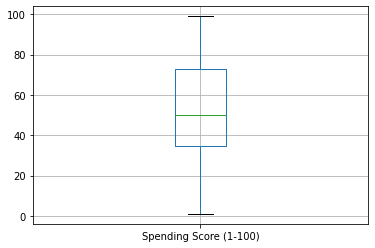

In [ ]:
dataframe.boxplot(column="Spending Score (1-100)")

Вывод: выбросов по критерию Spending Score (1-100) **нет**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6d8d353490>]],
      dtype=object)

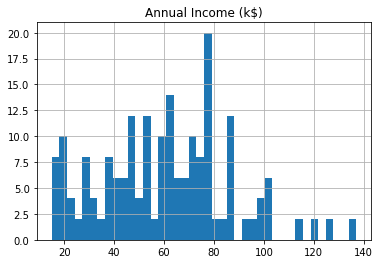

In [ ]:
dataframe.hist(column="Annual Income (k$)", bins=40)

In [ ]:
import seaborn as sns

Сделаем импорт бибилиотеки Seaborn для более продвинутой работы с графикой (на данный момент нам нужно для того чтобы сделать диаграмму рассеяния - scatterplot)

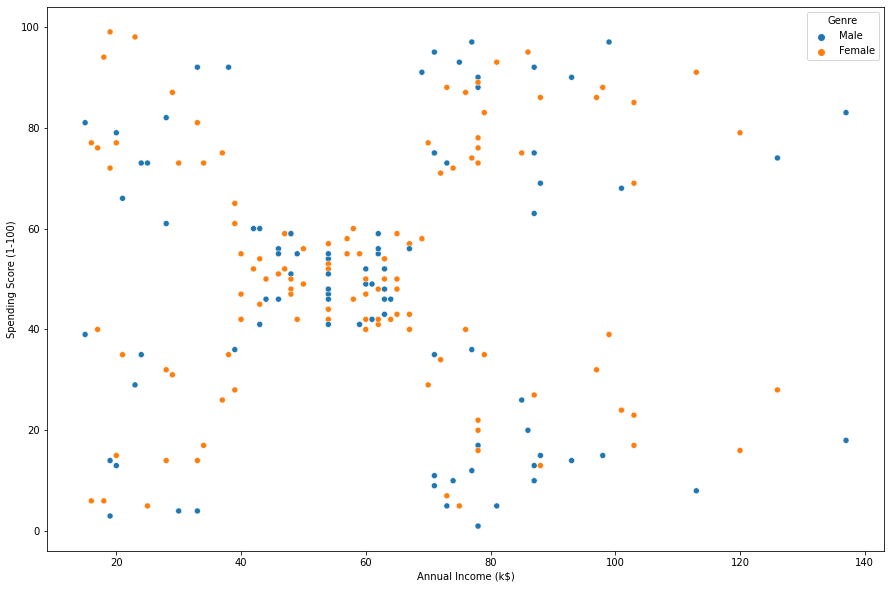

In [ ]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='Annual Income (k$)' , y = 'Spending Score (1-100)',data=dataframe , hue='Genre');

Вывод: по данной диаграмме мы видим что бизнесом **чаще всего занимаются женщины**

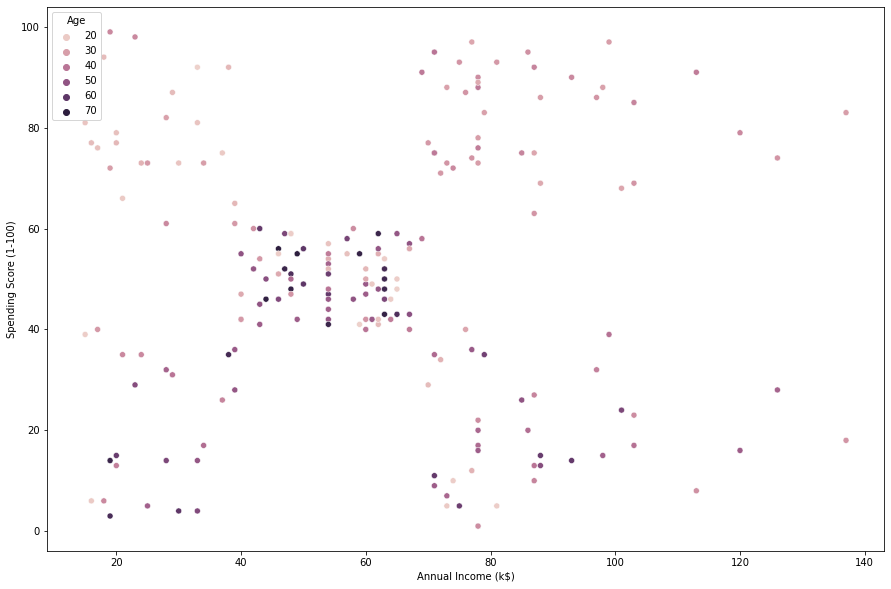

In [ ]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='Annual Income (k$)' , y = 'Spending Score (1-100)', data=dataframe, hue='Age');

Вывод: если брать диаграмму рассеяния по возрасту, мы видим что годовой доход (Annual Income (k$)) **больше у людей от 20-40 лет.**

**"Лирическое отступление" или ситуация когда Ира пыталась поменять цвета на скаттерплоте**

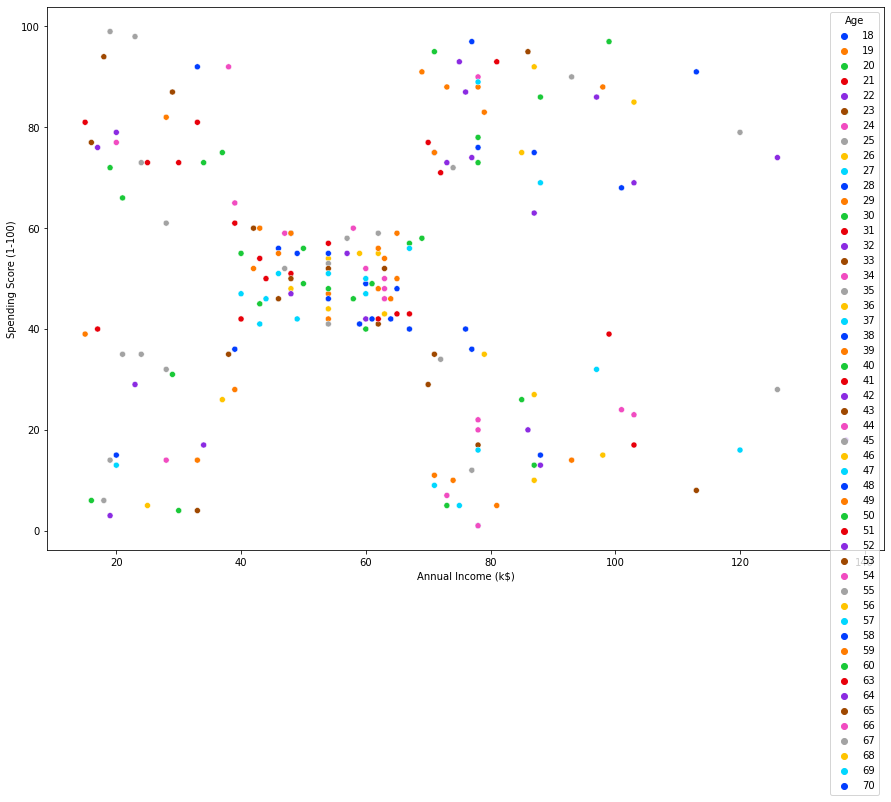

In [ ]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='Annual Income (k$)' , y = 'Spending Score (1-100)',palette = "bright", data=dataframe, hue='Age');

4. Определите наилучшее число кластеров с помощью графической зависимости числа кластеров от суммы квадратов расстояний значений датасета до центра кластера.

Кластерный анализ — многомерная статистическая процедура, выполняющая сбор данных, содержащих информацию о выборке объектов, и затем упорядочивающая объекты в сравнительно однородные группы. Задача кластеризации относится к статистической обработке, а также к широкому классу задач обучения без учителя.




---




(как я поняла) Грубо говоря это обработка данных из массива и соединение их в группы по признакам

Берем последние 3 столбца т.к. они содержат **типы данных int** и одновременно попытаемся **решить задачу перевода текстовых данных в цифры в столбце AGE** *для более точных данных*

In [ ]:
new_dataframe = dataframe.loc[dataframe['Genre'] == "Male", 'Genre'] = 0

In [ ]:
new_dataframe = dataframe.loc[dataframe['Genre'] == "Female", 'Genre'] = 1

In [ ]:
dataframe['Genre']

0      0
1      0
2      1
3      1
4      1
      ..
195    1
196    1
197    0
198    0
199    0
Name: Genre, Length: 200, dtype: object

In [ ]:
x = dataframe[["Genre","Age","Annual Income (k$)","Spending Score (1-100)"]]
x

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40
...,...,...,...,...
195,1,35,120,79
196,1,45,126,28
197,0,32,126,74
198,0,32,137,18


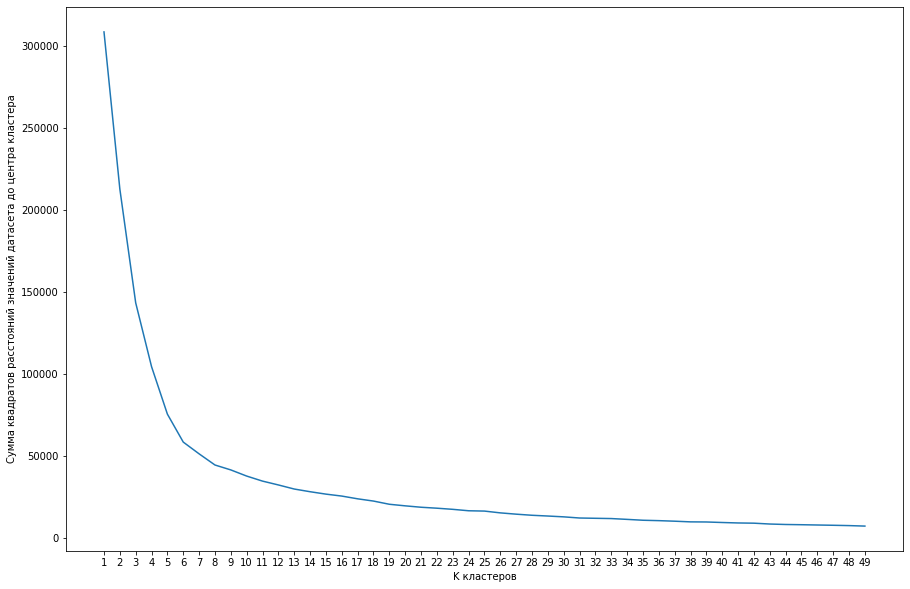

In [ ]:
data = []
plt.figure(figsize=(15,10));

# автоподбор кластеров в зависимости от полученных данных по 4 столбцам 
for i in range(1,50):

    # высчитывание кластеров
    k_means = KMeans(n_clusters=i)

    # обучение
    k_means.fit(x)
    data.append(k_means.inertia_)

# построение графика

plt.plot(range(1,50),data)
plt.xticks(range(1,50));

plt.xlabel('K кластеров')
plt.ylabel('Сумма квадратов расстояний значений датасета до центра кластера');

5. Обучить модель К-средних и предсказать кластер для каждого значения из датасета.

In [ ]:
# беру 6 кластеров из-за возраста!
k_srednih = KMeans(n_clusters = 6, max_iter = 10000)
y_k_srednih= k_srednih.fit_predict(x)

In [ ]:
y_k_srednih

array([4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5,
       4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 0, 5, 0, 2,
       4, 5, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2,
       2, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 3, 1, 3, 1, 3, 1,
       2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

Вывод: наша обученная модель выбирает **приемущественно 0,1,2,4 кластеров.**



6. Построить графическую интерпретацию из пункта 3, с центрами кластеров.

In [ ]:
pip install clustergram

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from clustergram import Clustergram

K=1 skipped. Mean computed from data directly.
K=2 fitted in 2.7697455883026123 seconds.
K=3 fitted in 16.144673109054565 seconds.
K=4 fitted in 5.730870246887207 seconds.
K=5 fitted in 2.440079689025879 seconds.
K=6 fitted in 2.484877109527588 seconds.


Text(0.5, 1.0, 'K-Means (scikit-learn)')

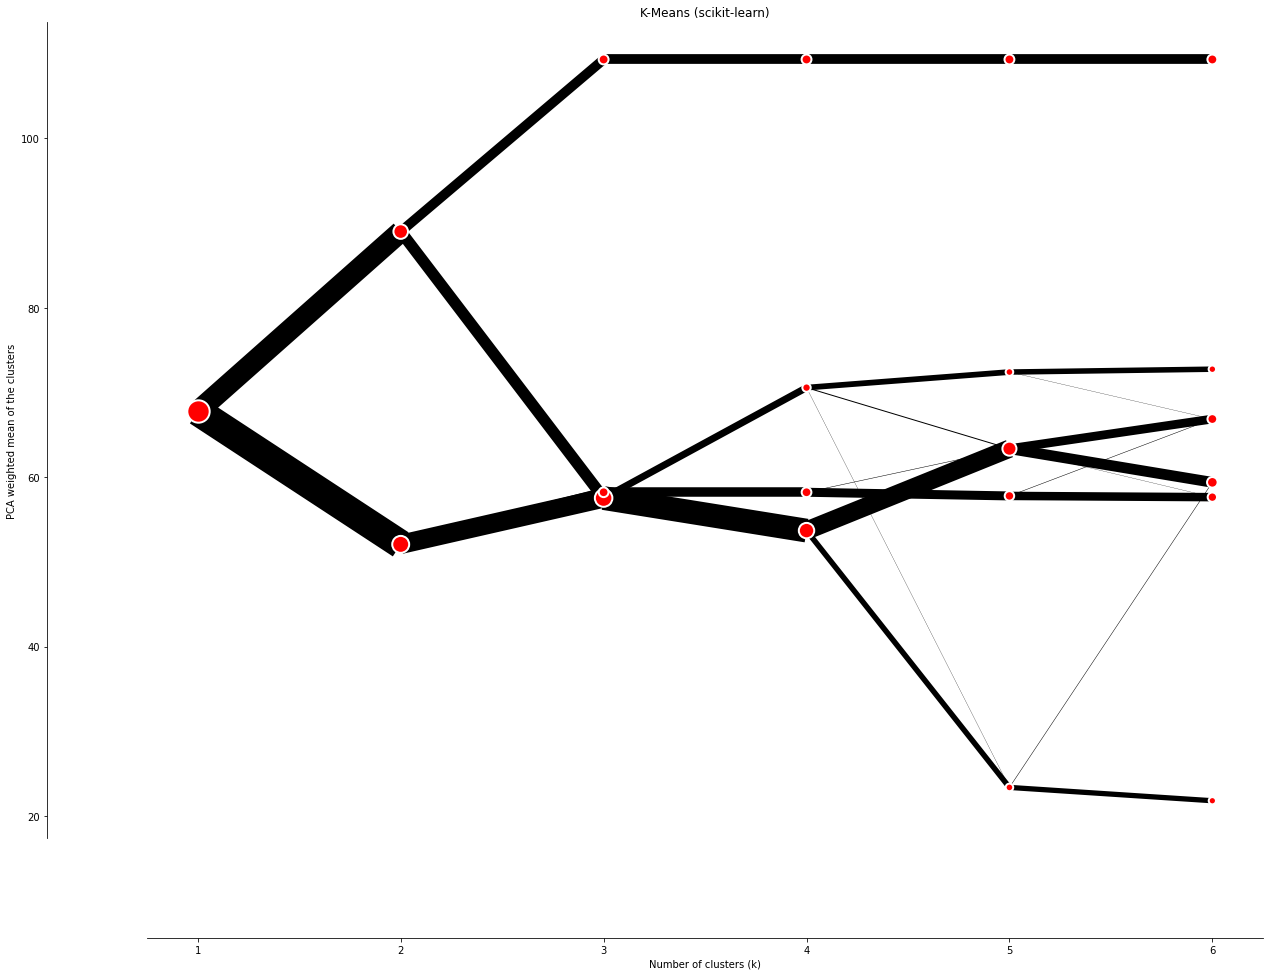

In [ ]:
cgram = Clustergram(range(1, 7), n_init=1000)
cgram.fit(x)

ax = cgram.plot(
    figsize=(20,15),
)
ax.yaxis.grid(False)
sns.despine(offset=100)
ax.set_title("K-Means (scikit-learn)")

In [ ]:
x.columns = ["Genre","Age", "Annual_Income", "Spending_Score"]
x

,Genre,Age,Annual_Income,Spending_Score
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40
...,...,...,...,...
195,1,35,120,79
196,1,45,126,28
197,0,32,126,74
198,0,32,137,18


Не удалось взять столбец x.Genre из датасета для постройки кластеризации, **интерпритатор выдавал ошибку!**

Да и по общей сути данный столбец **не влияет на датасет** т.к. имеет всего два значения 0 и 1

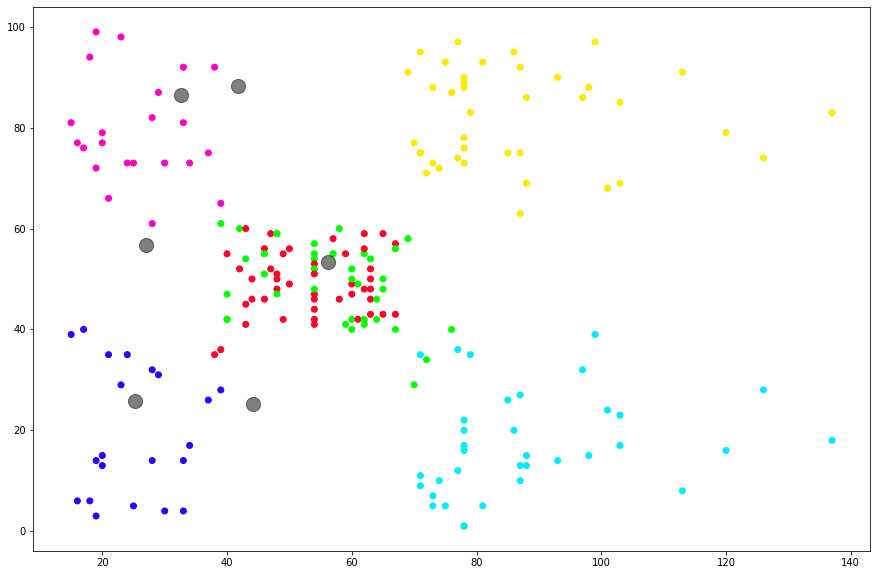

In [ ]:
plt.figure(figsize=(15,10));

plt.scatter(x.Annual_Income, x.Spending_Score, c=y_k_srednih, cmap='gist_rainbow')
centers = k_srednih.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 2], c='black', s=200, alpha=0.5);


Вывод: возможно по 10 кластерам многовато делить на группы **(눈_눈)**

Обновление спустя 1 час: сделала на 6 кластерах



---


Хорошо идет разделение у **синей, розовой, голубой и красной** групп на 6 кластерах


---



Остальные же "залезают" друг на друга т.к. **возможно имеют общие признаки**

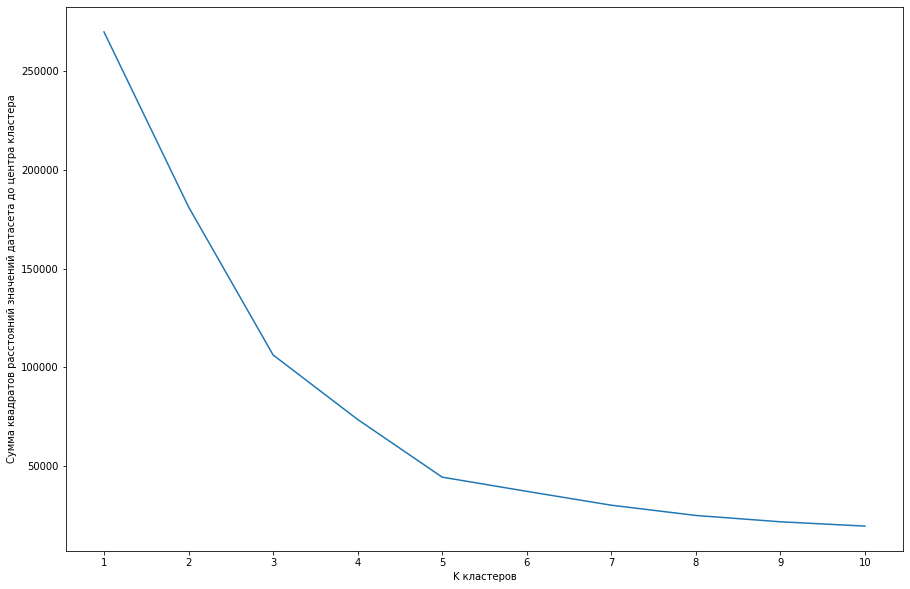

In [ ]:
x_2 = dataframe.iloc[:,3:]
wcss = []
plt.figure(figsize=(15,10));
for i in range(1,11):
    k_means = KMeans(n_clusters=i)
    k_means.fit(x_2)
    wcss.append(k_means.inertia_)
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11));
plt.xlabel('K кластеров')
plt.ylabel('Сумма квадратов расстояний значений датасета до центра кластера');

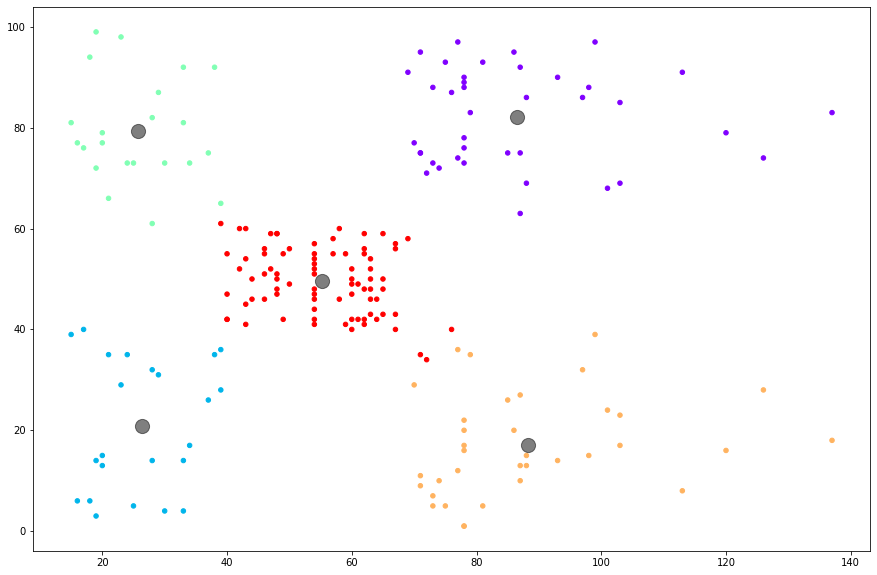

In [ ]:
kmeans2 = KMeans(n_clusters = 5)
y_k_srednih_2 = kmeans2.fit_predict(x_2)
x_2.columns = ["Income", "Score"]
plt.figure(figsize=(15,10));
plt.scatter(x_2.Income, x_2.Score, c=y_k_srednih_2, s=20, cmap='rainbow')
centers2 = kmeans2.cluster_centers_
plt.scatter(centers2[:, 0], centers2[:, 1], c='black', s=200, alpha=0.5);

7. Построить графическую интерпретацию с центрами кластеров, в качестве x-координаты используйте Возраст, в качестве y-координаты Spending Score.

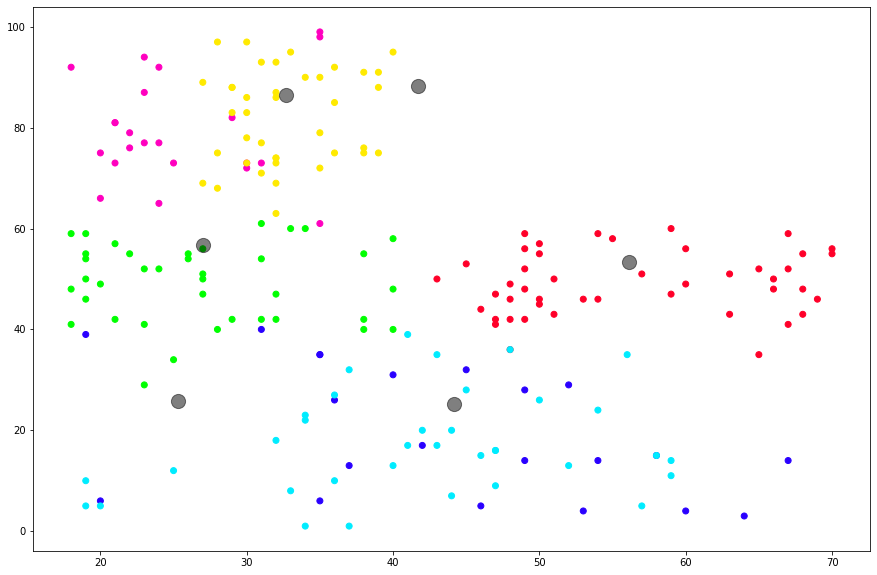

In [ ]:
plt.figure(figsize=(15,10));

plt.scatter(x.Age, x.Spending_Score, c=y_k_srednih, cmap='gist_rainbow')
centers = k_srednih.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 2], c='black', s=200, alpha=0.5);

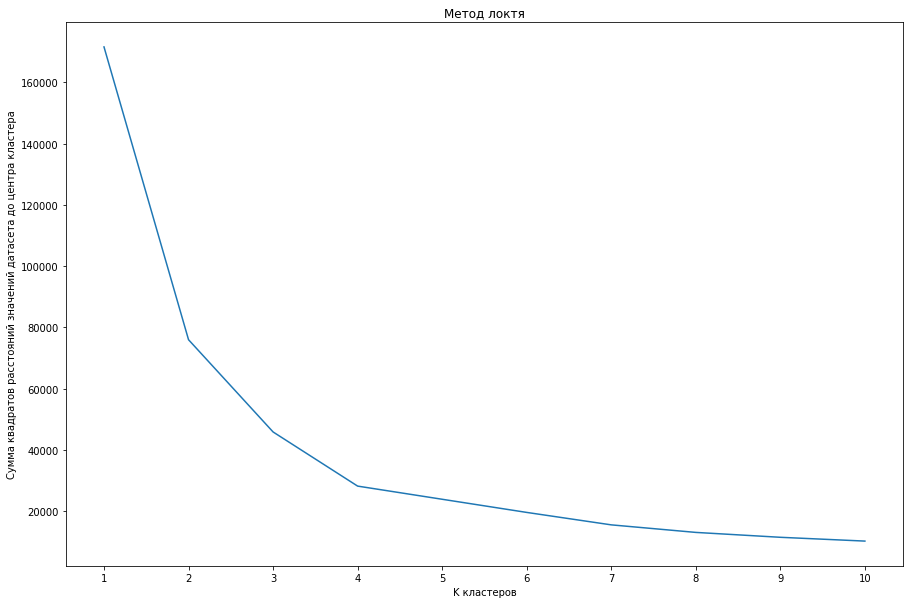

In [ ]:
x_3 = dataframe.iloc[:,[2,4]]
wcss = []
plt.figure(figsize=(15,10));
for i in range(1,11):
    k_means = KMeans(n_clusters=i)
    k_means.fit(x_3)
    wcss.append(k_means.inertia_)
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11));
plt.title('Метод локтя')
plt.xlabel('K кластеров')
plt.ylabel('Сумма квадратов расстояний значений датасета до центра кластера');

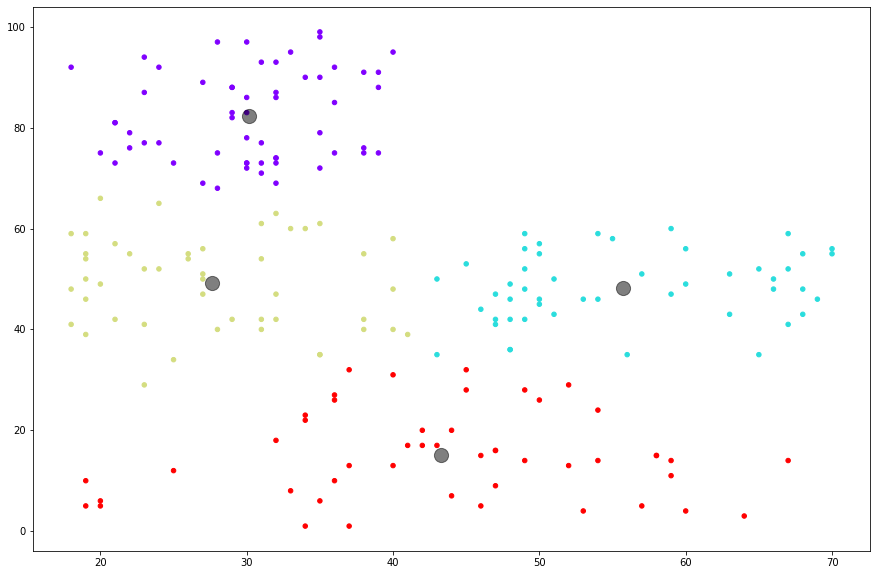

In [ ]:
kmeans3 = KMeans(n_clusters = 4)
y_k_srednih_3 = kmeans3.fit_predict(x_3)
x_3.columns = ["Age", "Score"]
plt.figure(figsize=(15,10));
plt.scatter(x_3.Age, x_3.Score, c=y_k_srednih_3, s=20, cmap='rainbow')
centers3 = kmeans3.cluster_centers_
plt.scatter(centers3[:, 0], centers3[:, 1], c='black', s=200, alpha=0.5);

8. Оцените модель с помощью метрик.


Импортируем библтотеку для метрик

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

**calinski_harabasz_score** — это дисперсия внутри кластера, деленная на дисперсию между кластерами.


Вычислите оценку Калински и Харабаша.

Он также известен как критерий отношения дисперсии.

Оценка определяется как отношение суммы межкластерной дисперсии и внутрикластерной дисперсии.

Если основные метки истинности неизвестны, для оценки модели можно использовать индекс Калински-Харабаса ( sklearn.metrics.calinski_harabasz_score), также известный как критерий отношения дисперсии, где более высокий показатель Калински-Харабаса относится к модели с более четко определенными кластерами.

Индекс представляет собой отношение суммы дисперсии между кластерами и внутрикластерной дисперсии для всех кластеров (где дисперсия определяется как сумма квадратов расстояний):


---


**silhouette_score** -способ изучения разделительного расстояния между результирующими кластерами Наблюдений (Observation), часто используемый вместе с Методом K-средних (K-Means). График силуэта отображает меру того, насколько близко каждая точка в одном кластере находится к точкам в соседних кластерах, и, таким образом, обеспечивает способ визуальной оценки количества кластеров. Эта мера имеет диапазон [-1, 1].


---



Коэффициенты силуэта (так называются эти значения) **около +1** указывают на то, что образец находится далеко от соседних кластеров.

Значение, **близкое к нулю указывает**, что выборка находится на границе принятия решения между двумя соседними кластерами или очень близко к ней.

А **отрицательные значения** указывают на то, что эти выборки могли быть назначены неправильному кластеру.


---




In [ ]:
print("silhouette_score:", silhouette_score(x,  y_k_srednih))
print("calinski_harabasz_score:", calinski_harabasz_score(x,  y_k_srednih))

silhouette_score: 0.45205475380756527
calinski_harabasz_score: 166.58349562213596


Вывод: silhouette_score - кластеры расположены достаточно близко

calinski_harabasz_score (среднее отклонение(?)) - самый высокий среди 3 случаев дисперсий **(разброс в данных очень высок)**

In [ ]:
print("silhouette_score:", silhouette_score(x_2,  y_k_srednih_2))
print("calinski_harabasz_score:", calinski_harabasz_score(x,  y_k_srednih_2))

silhouette_score: 0.553931997444648
calinski_harabasz_score: 150.75536557183094


Вывод: silhouette_score - кластеры расположены **гораздо ближе чем в первом случае:**

calinski_harabasz_score - тоже высокий как и 1 случай (аналогично с 1 - **разброс высокий**)

In [ ]:
print("silhouette_score:", silhouette_score(x_3,  y_k_srednih_3))
print("calinski_harabasz_score:", calinski_harabasz_score(x,  y_k_srednih_3))

silhouette_score: 0.49973941540141753
calinski_harabasz_score: 62.61912657425041


Вывод: silhouette_score - расположены близко, но это **среднее между 1 и 2 случаем**

calinski_harabasz_score - самая низкая дисперсия среди 3 случаев **(разброс между данными не влияет на расположение данных  в кластерах)**

9. Сравните эффективность модели кластеризации в зависимости от количества кластеров. Сделайте выводы.

In [ ]:
n_clusters = list(range(2,30))
s_scores = []
c_scores = []

for clstrs in n_clusters:    
    kmeansx = KMeans(n_clusters=clstrs)
    y_kmeansx = kmeansx.fit_predict(x)

    s_scores.append(silhouette_score(x, y_kmeansx))
    c_scores.append(calinski_harabasz_score(x, y_kmeansx))

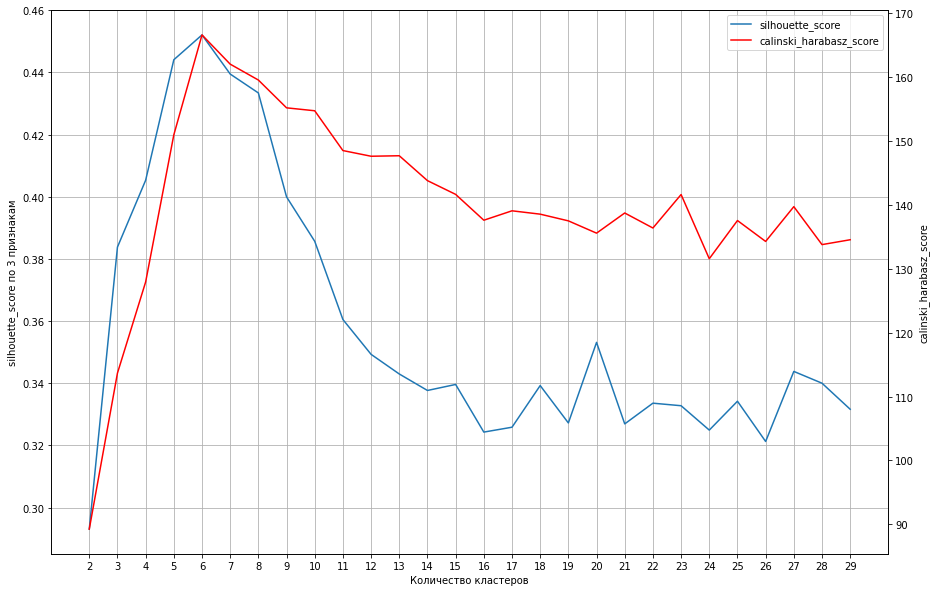

In [ ]:
fig = plt.figure(figsize=(15, 10))
plot1, = plt.plot(n_clusters, s_scores, label='silhouette_score')
plt.xlabel('Количество кластеров')
plt.ylabel('silhouette_score по 3 признакам')
plt.xticks(n_clusters)
plt.grid()
plt.twinx()
plot2, = plt.plot(n_clusters, c_scores, label='calinski_harabasz_score', color="red")
plt.ylabel('calinski_harabasz_score')
plt.legend(handles=[plot1, plot2]);

In [ ]:
n_clusters = list(range(2,30))
s_scores = []
c_scores = []

for clstrs in n_clusters:    
    kmeansx = KMeans(n_clusters=clstrs)
    y_kmeansx = kmeansx.fit_predict(x_2)

    s_scores.append(silhouette_score(x_2, y_kmeansx))
    c_scores.append(calinski_harabasz_score(x, y_kmeansx))

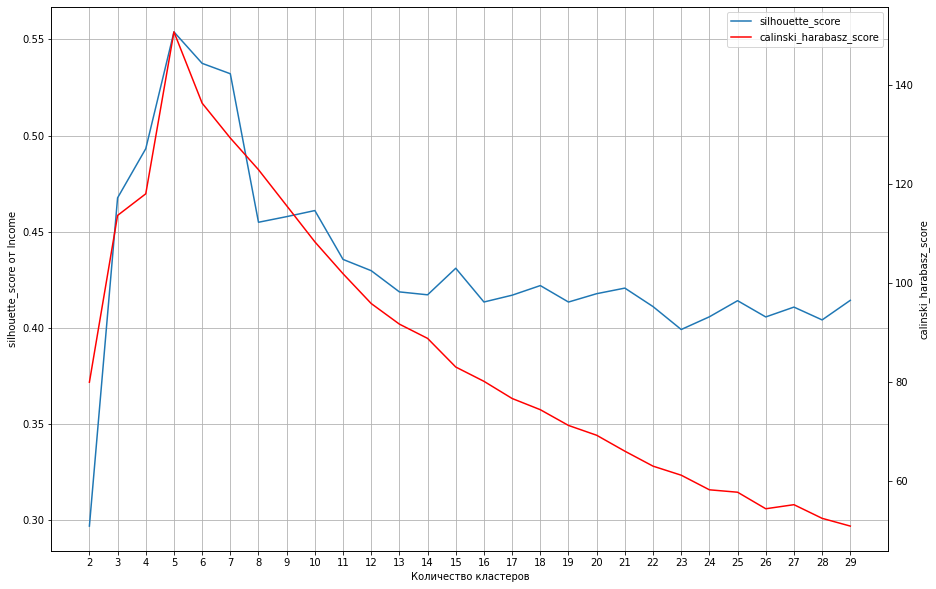

In [ ]:
fig = plt.figure(figsize=(15, 10))
plot1, = plt.plot(n_clusters, s_scores, label='silhouette_score')
plt.xlabel('Количество кластеров')
plt.ylabel('silhouette_score от Income')
plt.xticks(n_clusters)
plt.grid()
plt.twinx()
plot2, = plt.plot(n_clusters, c_scores, label='calinski_harabasz_score', color="red")
plt.ylabel('calinski_harabasz_score')
plt.legend(handles=[plot1, plot2]);

In [ ]:
n_clusters = list(range(2,30))
s_scores = []
c_scores = []

for clstrs in n_clusters:    
    kmeansx = KMeans(n_clusters=clstrs)
    y_kmeansx = kmeansx.fit_predict(x_3)

    s_scores.append(silhouette_score(x_3, y_kmeansx))
    c_scores.append(calinski_harabasz_score(x, y_kmeansx))

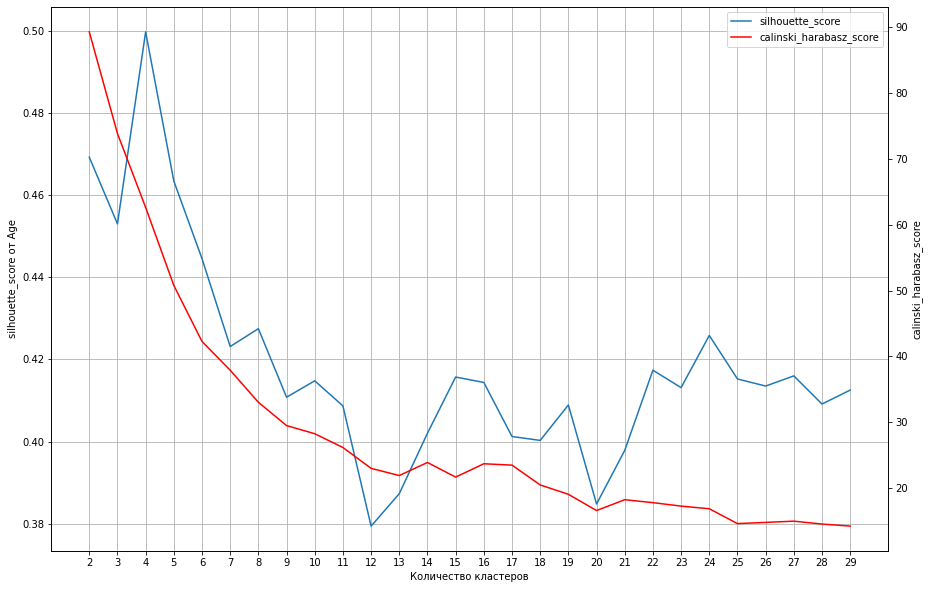

In [ ]:
fig = plt.figure(figsize=(15, 10))
plot1, = plt.plot(n_clusters, s_scores, label='silhouette_score')
plt.xlabel('Количество кластеров')
plt.ylabel('silhouette_score от Age')
plt.xticks(n_clusters)
plt.grid()
plt.twinx()
plot2, = plt.plot(n_clusters, c_scores, label='calinski_harabasz_score', color="red")
plt.ylabel('calinski_harabasz_score')
plt.legend(handles=[plot1, plot2]);